<a href="https://colab.research.google.com/github/miprecia/MOVING-AVERAGE-PROJECTS/blob/main/MOVING_AVERAGE_CROSSOVER_BACKTEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MOVING AVERAGE ALGORITHM TRADING CROSSOVER BACKTEST

In [160]:
# importing libaries
import pandas_datareader as pdr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

In [161]:
SLOW_MA = 200
FAST_MA = 20
STARTING_BALANCE = 10000

In [162]:
START = datetime.datetime(2005,1,1)
END = datetime.datetime(2015,1,1)
YEARS = (END - START).days/365.25

In [163]:
price = yf.download("AAPL", start= START,end = END)
price.head()

/tmp/ipython-input-1647683658.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price = yf.download("AAPL", start= START,end = END)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2005-01-03,0.949067,0.976359,0.938720,0.971410,691992000
2005-01-04,0.958814,0.981756,0.944268,0.956564,1096810400
2005-01-05,0.967211,0.978458,0.960463,0.966611,680433600
2005-01-06,0.967961,0.973359,0.949667,0.969760,705555200
2005-01-07,1.038440,1.044139,0.970960,0.974709,2227450400


In [164]:
price2 = price.drop(['High', 'Low', 'Volume'], axis=1)

In [165]:
price2.head()

Price,Close,Open
Ticker,AAPL,AAPL
Date,,
2005-01-03,0.949067,0.971410
2005-01-04,0.958814,0.956564
2005-01-05,0.967211,0.966611
2005-01-06,0.967961,0.969760
2005-01-07,1.038440,0.974709


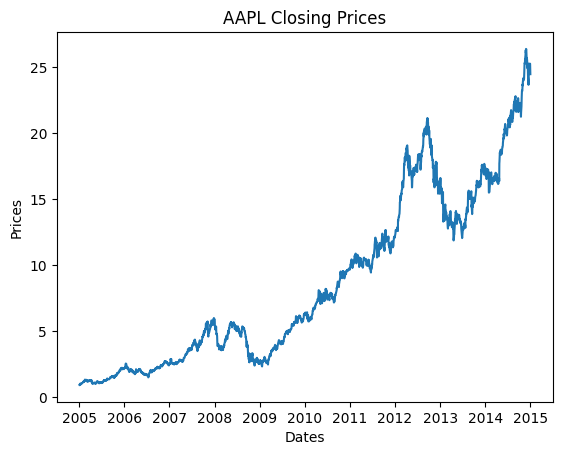

In [166]:
plt.plot(price.Close)
plt.title("AAPL Closing Prices")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.show()

In [167]:
# calaculating the return and bench balance
price['Return'] = price[('Close', 'AAPL')] / price[('Open', 'AAPL')]
price['Bench_Bal'] = STARTING_BALANCE * price['Return'].cumprod()
price.tail()

Price,Close,High,Low,Open,Volume,Return,Bench_Bal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2014-12-24,24.831686,24.986870,24.831686,24.958050,57918400,0.994937,2736.288721
2014-12-26,25.270634,25.388130,24.831685,24.851637,134884000,1.016860,2782.422389
2014-12-29,25.252892,25.443545,25.206335,25.226288,110395600,1.001055,2785.356727
2014-12-30,24.944752,25.255120,24.853859,25.193047,119526000,0.990144,2757.905062
2014-12-31,24.470327,25.079980,24.432640,25.011256,165613600,0.978373,2698.258766


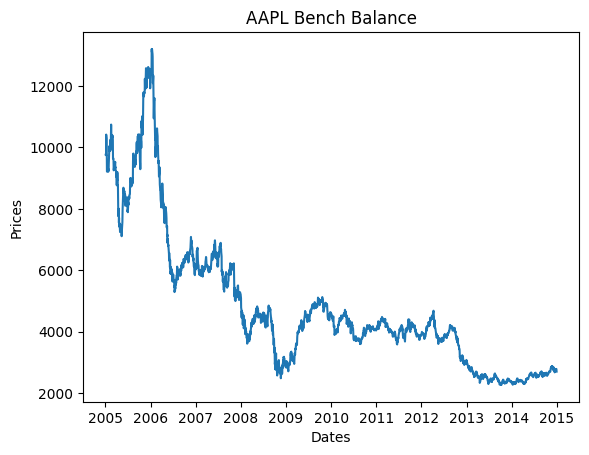

In [168]:
plt.plot(price.Bench_Bal)
plt.title("AAPL Bench Balance")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.show()

In [169]:
# calculating the metrics
bench_return = round(((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[0]) - 1)*100, 2)
#compounded anual growth rate
bench_cagr  = round(((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[0]) ** (1/YEARS)-1)*100, 2)
print(bench_return)
print(bench_cagr)

-72.38
-12.08


In [170]:
# calculating the drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

Bench_DD =round(((price.Bench_DD / price.Bench_Peak).min())*100, 2)

Bench_DD

-82.86

In [171]:
# Calculating the moving averages
price['FAST_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['SLOW_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

Price,Close,High,Low,Open,Volume,Return,Bench_Bal,Bench_Peak,Bench_DD,FAST_MA,SLOW_MA
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2014-12-24,24.831686,24.986870,24.831686,24.958050,57918400,0.994937,2736.288721,13211.518687,-10475.229965,25.053155,21.087187
2014-12-26,25.270634,25.388130,24.831685,24.851637,134884000,1.016860,2782.422389,13211.518687,-10429.096298,24.997622,21.130750
2014-12-29,25.252892,25.443545,25.206335,25.226288,110395600,1.001055,2785.356727,13211.518687,-10426.161960,24.941977,21.175155
2014-12-30,24.944752,25.255120,24.853859,25.193047,119526000,0.990144,2757.905062,13211.518687,-10453.613625,24.913711,21.217699
2014-12-31,24.470327,25.079980,24.432640,25.011256,165613600,0.978373,2698.258766,13211.518687,-10513.259921,24.866601,21.257144


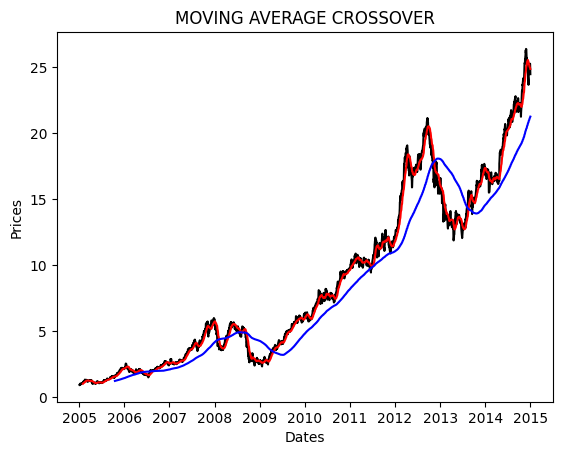

In [198]:
# Plotting graph
plt.title("MOVING AVERAGE CROSSOVER")
plt.plot(price.Close, color = "black", label = "Close")
plt.plot(price.FAST_MA, color = "red", label = "FAST_MA")
plt.plot(price.SLOW_MA, color = "blue", label = "SLOW_MA")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.show()

In [173]:
# defining enteries
price['Long'] = price.FAST_MA > price.SLOW_MA

price.tail()

Price,Close,High,Low,Open,Volume,Return,Bench_Bal,Bench_Peak,Bench_DD,FAST_MA,SLOW_MA,Long
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2014-12-24,24.831686,24.986870,24.831686,24.958050,57918400,0.994937,2736.288721,13211.518687,-10475.229965,25.053155,21.087187,True
2014-12-26,25.270634,25.388130,24.831685,24.851637,134884000,1.016860,2782.422389,13211.518687,-10429.096298,24.997622,21.130750,True
2014-12-29,25.252892,25.443545,25.206335,25.226288,110395600,1.001055,2785.356727,13211.518687,-10426.161960,24.941977,21.175155,True
2014-12-30,24.944752,25.255120,24.853859,25.193047,119526000,0.990144,2757.905062,13211.518687,-10453.613625,24.913711,21.217699,True
2014-12-31,24.470327,25.079980,24.432640,25.011256,165613600,0.978373,2698.258766,13211.518687,-10513.259921,24.866601,21.257144,True


In [174]:
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1 )
price.tail()

Price,Close,High,Low,Open,Volume,Return,Bench_Bal,Bench_Peak,Bench_DD,FAST_MA,SLOW_MA,Long,Sys_Ret
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,
2014-12-24,24.831686,24.986870,24.831686,24.958050,57918400,0.994937,2736.288721,13211.518687,-10475.229965,25.053155,21.087187,True,0.994937
2014-12-26,25.270634,25.388130,24.831685,24.851637,134884000,1.016860,2782.422389,13211.518687,-10429.096298,24.997622,21.130750,True,1.016860
2014-12-29,25.252892,25.443545,25.206335,25.226288,110395600,1.001055,2785.356727,13211.518687,-10426.161960,24.941977,21.175155,True,1.001055
2014-12-30,24.944752,25.255120,24.853859,25.193047,119526000,0.990144,2757.905062,13211.518687,-10453.613625,24.913711,21.217699,True,0.990144
2014-12-31,24.470327,25.079980,24.432640,25.011256,165613600,0.978373,2698.258766,13211.518687,-10513.259921,24.866601,21.257144,True,0.978373


In [185]:
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

Price,Close,High,Low,Open,Volume,Return,Bench_Bal,Bench_Peak,Bench_DD,FAST_MA,SLOW_MA,Long,Sys_Ret,Sys_Bal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,,
Date,,,,,,,,,,,,,,
2014-12-24,24.831686,24.986870,24.831686,24.958050,57918400,0.994937,2736.288721,13211.518687,-10475.229965,25.053155,21.087187,True,0.994937,2506.965787
2014-12-26,25.270634,25.388130,24.831685,24.851637,134884000,1.016860,2782.422389,13211.518687,-10429.096298,24.997622,21.130750,True,1.016860,2549.233082
2014-12-29,25.252892,25.443545,25.206335,25.226288,110395600,1.001055,2785.356727,13211.518687,-10426.161960,24.941977,21.175155,True,1.001055,2551.921499
2014-12-30,24.944752,25.255120,24.853859,25.193047,119526000,0.990144,2757.905062,13211.518687,-10453.613625,24.913711,21.217699,True,0.990144,2526.770504
2014-12-31,24.470327,25.079980,24.432640,25.011256,165613600,0.978373,2698.258766,13211.518687,-10513.259921,24.866601,21.257144,True,0.978373,2472.123046


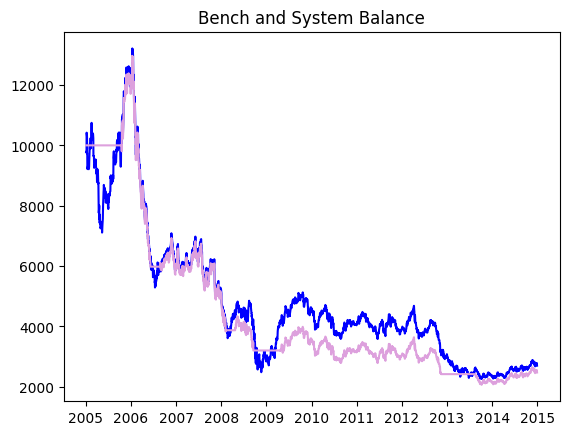

In [200]:
plt.title("Bench and System Balance")
plt.plot(price.Bench_Bal, color = "blue", label = "Bench balance")
plt.plot(price.Sys_Bal, color = "plum", label = "System balance")

plt.show()

In [190]:
sys_return = round(((price.Sys_Bal.iloc[-1] / price.Sys_Bal.iloc[0]) - 1)*100 , 2)
sys_cagr  = round(((price.Sys_Bal.iloc[-1] / price.Sys_Bal.iloc[0]) ** (1/YEARS)-1)*100, 2)

print(sys_return)
print (sys_cagr)

-75.28
-13.04


In [195]:
price['Sys_Peak'] = price.Sys_Bal.cummax()

price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

Sys_DD =round(((price.Sys_DD / price.Sys_Peak).min())*100, 2)

print(Sys_DD)

-84.0


In [196]:
print(f'Benchmanrk Total Return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {Bench_DD}%')
print('')
print(f'System Total Return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {Sys_DD}')

Benchmanrk Total Return: -72.38%
Benchmark CAGR: -12.08
Benchmark DD: -82.86%

System Total Return: -75.28%
System CAGR: -13.04
System DD: -84.0
